In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [135]:
df = pd.read_csv("C:/AI_File/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [136]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [137]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [138]:
# 레이블 갯수 확인 (변환 전)
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [139]:
# 불필요한 컬럼 제거
df.drop(columns=['Outcome'], inplace=True)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [140]:
X = df.drop('BMI', axis=1)
y = df['BMI']

In [141]:
X.head()

y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [142]:

Y = pd.get_dummies(y).values

In [143]:

X = X.values

In [144]:

X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [145]:

y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [146]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [158]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 7)                 56        
                                                                 
 dense_79 (Dense)            (None, 30)                240       
                                                                 
 dense_80 (Dense)            (None, 20)                620       
                                                                 
 dense_81 (Dense)            (None, 1)                 21        
                                                                 
Total params: 937
Trainable params: 937
Non-trainable params: 0
_________________________________________________________________


In [159]:

N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
20/20 [==============================] - 2s 34ms/step - loss: 648.6641 - mse: 648.6641 - val_loss: 310.1540 - val_mse: 310.1540
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 206.8829 - mse: 206.8829 - val_loss: 137.3858 - val_mse: 137.3858
Epoch 3/20
20/20 [==============================] - 0s 6ms/step - loss: 98.1472 - mse: 98.1472 - val_loss: 75.7732 - val_mse: 75.7732
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 74.3722 - mse: 74.3722 - val_loss: 67.3656 - val_mse: 67.3656
Epoch 5/20
20/20 [==============================] - 0s 6ms/step - loss: 69.3899 - mse: 69.3899 - val_loss: 78.8755 - val_mse: 78.8755
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 67.6810 - mse: 67.6810 - val_loss: 68.8996 - val_mse: 68.8996
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 67.5466 - mse: 67.5466 - val_loss: 63.6629 - val_mse: 63.6629
Epoch 8/20
20/20 [==============================] - 0

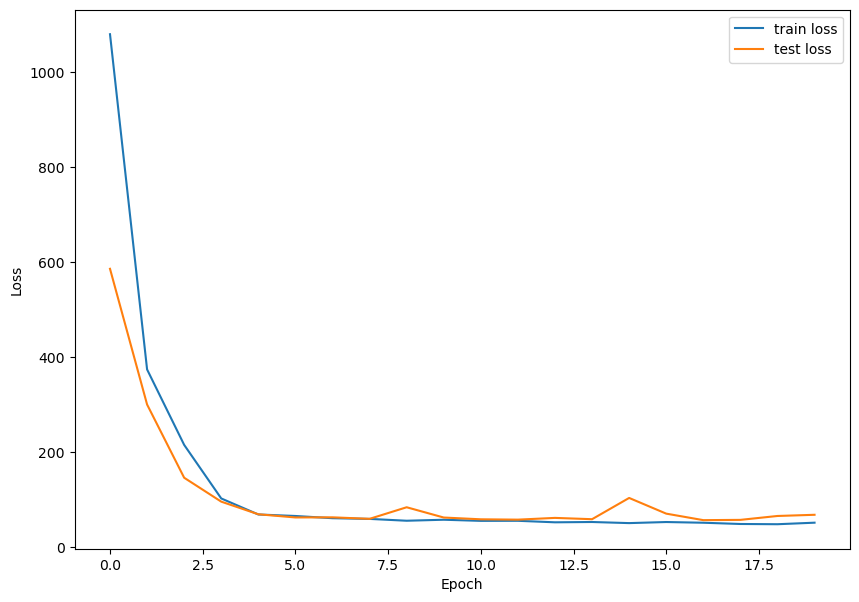

In [155]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [157]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 68.3754 - mse: 68.3754


[68.37541961669922, 68.37541961669922]